In [1]:
import sklearn
import pandas as pd
import numpy as np
print(sklearn.__version__)
import lightgbm as lgb
print(lgb.__version__)
import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, matthews_corrcoef, recall_score, f1_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from scipy.stats import loguniform as _loguniform

import pickle
from sklearn import tree

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

0.23.1
2.2.3


In [2]:
df = pd.read_csv("ECs_presence_absence.csv")
df.shape
df

,Genome,ECs_0002,ECs_0003,ECs_0004,ECs_0005,ECs_0006,ECs_0007,ECs_0008,ECs_0009,ECs_0010,...,ECs_5772,ECs_5773,ECs_5774,ECs_5775,ECs_5776,ECs_5777,ECs_5779,ECs_5780,ECs_5781,EHEC
0,06QMA126-1-unicyclerassembly,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,0,0
1,06QMA140-2-unicycler-assembly,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,0
2,06QMA181-1a-Unicycler-assembly,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,0,0
3,06QMA227-3-Unicycler-assembly,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,0,0
4,07HMPA386-Unicycler-assembly,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,NC809-Unicycler-assembly,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,0,0
1489,NV34-Unicycler-assembly,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
1490,NV36-unicycler-50x-assembly,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,0,1,0,0
1491,Slk8430761-flye-racon-medaka-consensus,1,1,0,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,1,1


In [3]:
X = df.drop(['Genome','EHEC'], axis=1)
y = df['EHEC']
X.head()

,ECs_0002,ECs_0003,ECs_0004,ECs_0005,ECs_0006,ECs_0007,ECs_0008,ECs_0009,ECs_0010,ECs_0012,...,ECs_5771,ECs_5772,ECs_5773,ECs_5774,ECs_5775,ECs_5776,ECs_5777,ECs_5779,ECs_5780,ECs_5781
0,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,0


In [4]:
def variance_threshold_selector(data, threshold=0.1):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]
X = variance_threshold_selector(X, 0.1)
X.head(5)

,ECs_0023,ECs_0024,ECs_0025,ECs_0052,ECs_0053,ECs_0061,ECs_0073,ECs_0146,ECs_0217,ECs_0218,...,ECs_5738,ECs_5740,ECs_5741,ECs_5742,ECs_5743,ECs_5764,ECs_5766,ECs_5773,ECs_5779,ECs_5781
0,0,0,1,1,1,0,0,1,1,1,...,0,1,1,0,1,1,1,1,0,0
1,1,1,1,1,1,1,1,1,0,1,...,1,0,0,0,0,1,0,1,1,0
2,0,0,1,1,1,0,0,1,1,1,...,1,1,1,0,0,1,1,1,0,0
3,0,0,1,1,1,0,0,1,1,0,...,0,0,0,0,0,1,1,1,0,0
4,0,0,1,1,1,0,0,1,1,1,...,0,0,1,0,1,1,1,1,0,0


In [5]:
Z = pd.read_csv("ECs_cluster.csv", sep =";")

In [6]:
Z.head(5)

,Genome,cluster_ID-d5,cluster_ID-d10,cluster_ID-d20,cluster_ID-d50,cluster_ID-d100,cluster_ID-d200
0,06QMA126-1-unicyclerassembly,1,1,1,1,1,1
1,06QMA140-2-unicycler-assembly,2,2,2,2,2,2
2,06QMA181-1a-Unicycler-assembly,3,3,3,3,3,3
3,06QMA227-3-Unicycler-assembly,4,4,4,4,4,1
4,07HMPA386-Unicycler-assembly,5,5,5,5,5,1


In [7]:
merged = pd.merge(df, Z, on="Genome")

In [8]:
cluster_ID = ["cluster_ID-d5", "cluster_ID-d10", "cluster_ID-d20", "cluster_ID-d50", "cluster_ID-d100", "cluster_ID-d200"]
classifiers = [('Logistic_Regression', LogisticRegression(penalty='l1', solver='liblinear', random_state=2)),
               ('SVM', SVC(kernel = "linear", random_state=2)),
               ('Random_Forest', RandomForestClassifier(random_state=2)),
               ('Gradient_Boosting', GradientBoostingClassifier(random_state=2)),
               ('Extra_Trees', ExtraTreesClassifier(random_state=2)),
               ('XGBoost', XGBClassifier(random_state=2)),
               ('LightGBM', LGBMClassifier(random_state=2)),
               ('Decision_Tree', DecisionTreeClassifier(random_state=2))]

results_df = pd.DataFrame(columns=['Model', 'CV Accuracy %', 'Mean Accuracy %'])

for i in cluster_ID:
    df = merged.groupby(i).first().reset_index()
    X = df.drop(['Genome', 'EHEC', i], axis=1)
    y = df['EHEC']
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2)
    
    for clf_name, clf in classifiers:
        # create pipeline
        estimators = [('Classifier', clf)]
        model = Pipeline(estimators)
        
        # evaluate pipeline
        kfold = KFold(n_splits=10)
        results = cross_val_score(model, X_train, y_train, cv=kfold)
        #print(f"{clf_name} {i}: {results}")
        results_df = results_df.append({"Model": f"{clf_name}-{i}", "CV Accuracy %": results, "Mean Accuracy %": results.mean()}, ignore_index=True)

print(results_df)


/home/idpa/miniconda3/envs/machine_learning_paper/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/idpa/miniconda3/envs/machine_learning_paper/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


                                  Model  \
0     Logistic_Regression-cluster_ID-d5   
1                     SVM-cluster_ID-d5   
2           Random_Forest-cluster_ID-d5   
3       Gradient_Boosting-cluster_ID-d5   
4             Extra_Trees-cluster_ID-d5   
5                 XGBoost-cluster_ID-d5   
6                LightGBM-cluster_ID-d5   
7           Decision_Tree-cluster_ID-d5   
8    Logistic_Regression-cluster_ID-d10   
9                    SVM-cluster_ID-d10   
10         Random_Forest-cluster_ID-d10   
11     Gradient_Boosting-cluster_ID-d10   
12           Extra_Trees-cluster_ID-d10   
13               XGBoost-cluster_ID-d10   
14              LightGBM-cluster_ID-d10   
15         Decision_Tree-cluster_ID-d10   
16   Logistic_Regression-cluster_ID-d20   
17                   SVM-cluster_ID-d20   
18         Random_Forest-cluster_ID-d20   
19     Gradient_Boosting-cluster_ID-d20   
20           Extra_Trees-cluster_ID-d20   
21               XGBoost-cluster_ID-d20   
22         

In [9]:
results_df.to_csv("CV3.csv")

In [8]:
df_cluster_d100 = merged.groupby("cluster_ID-d100").first().reset_index()
df_cluster_d100

,cluster_ID-d100,Genome,ECs_0002,ECs_0003,ECs_0004,ECs_0005,ECs_0006,ECs_0007,ECs_0008,ECs_0009,...,ECs_5777,ECs_5779,ECs_5780,ECs_5781,EHEC,cluster_ID-d5,cluster_ID-d10,cluster_ID-d20,cluster_ID-d50,cluster_ID-d200
0,1,06QMA126-1-unicyclerassembly,1,1,1,1,1,1,1,1,...,1,0,1,0,0,1,1,1,1,1
1,2,06QMA140-2-unicycler-assembly,1,1,1,1,1,1,1,1,...,1,1,1,0,0,2,2,2,2,2
2,3,06QMA181-1a-Unicycler-assembly,1,1,1,1,1,1,1,1,...,1,0,1,0,0,3,3,3,3,3
3,4,06QMA227-3-Unicycler-assembly,1,1,1,1,1,1,1,1,...,1,0,1,0,0,4,4,4,4,1
4,5,07HMPA386-Unicycler-assembly,1,1,1,1,1,1,1,1,...,1,0,1,0,0,5,5,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,752,NC672mucus-flye-pilon,1,1,1,1,1,1,1,1,...,1,0,1,0,0,1484,1465,1405,1199,1
752,753,NC809-Unicycler-assembly,1,1,1,1,1,1,1,1,...,1,0,1,0,0,1485,1466,1406,1200,1
753,754,NV34-Unicycler-assembly,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1486,1467,1407,1201,1
754,755,NV36-unicycler-50x-assembly,1,1,1,1,1,1,1,1,...,1,0,1,0,0,1487,1468,1408,1202,58


In [9]:
X = df_cluster_d100.drop(['Genome','EHEC', "cluster_ID-d5", "cluster_ID-d10", "cluster_ID-d20", "cluster_ID-d50", "cluster_ID-d100", "cluster_ID-d200"], axis=1)
y = df_cluster_d100['EHEC']
X.head()

,ECs_0002,ECs_0003,ECs_0004,ECs_0005,ECs_0006,ECs_0007,ECs_0008,ECs_0009,ECs_0010,ECs_0012,...,ECs_5771,ECs_5772,ECs_5773,ECs_5774,ECs_5775,ECs_5776,ECs_5777,ECs_5779,ECs_5780,ECs_5781
0,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,0


In [10]:
X = variance_threshold_selector(X, 0.1)

In [11]:
X.shape

(756, 1046)

In [12]:
y.shape

(756,)

In [13]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
y_resampled.value_counts()

0    87
1    87
Name: EHEC, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=2)

In [15]:
y_train.value_counts()

1    70
0    69
Name: EHEC, dtype: int64

In [16]:
y_test.value_counts()

0    18
1    17
Name: EHEC, dtype: int64

In [19]:
def select_features(X_train, y_train, X_test, y_test, n):
    classifiers = {
        'Logistic_Regression': LogisticRegressionCV(max_iter = 1000, penalty='l1', solver='liblinear', cv=10, random_state=42),
        'Random_Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient_Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'Extra_Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
        'XGBoost': XGBClassifier(n_estimators=100, random_state=42),
        'LightGBM': LGBMClassifier(n_estimators=100, random_state=42),
        'Decision_Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
        'SVM': SVC(kernel='linear', random_state=42)
    }
    results = pd.DataFrame()
    for clf_name, clf in classifiers.items():
        # configure to select a subset of features
        fs = SelectFromModel(clf, max_features=n)
        # learn relationship from training data
        fs.fit(X_train, y_train)
        # transform train input data
        X_train_fs = fs.transform(X_train)
        # transform test input data
        X_test_fs = fs.transform(X_test)
        # fit the selected features to a classification model
        clf.fit(X_train_fs, y_train)
        # predict on the test set
        y_pred = clf.predict(X_test_fs)
       
        # store the accuracy in a results dataframe
        results.loc[clf_name, 'Accuracy'] = accuracy_score(y_test, y_pred)
        # store the selected features as a comma-separated string
        results.loc[clf_name, 'Selected Features'] = ', '.join(X_train.columns[fs.get_support()])
        
         # store the selected features as a comma-separated string
        if clf_name == "XGBoost":
            clf.save_model("model_xgb_all.json")
   
        elif clf_name == "LightGBM":
            clf.booster_.save_model("Model_lgbm_all.txt")
    
        else:
            with open(f'{clf_name}_all.pkl', 'wb') as f:
                pickle.dump(clf, f)
        
        
        
    feature_counts = pd.DataFrame()
    for features in results['Selected Features']:
        for feature in features.split(', '):
            if feature in feature_counts.index:
                feature_counts.loc[feature, 'Count'] += 1
            else:
                feature_counts.loc[feature, 'Count'] = 1
    # sort the feature counts in descending order and return the results and feature counts dataframes
    feature_counts = feature_counts.sort_values(by='Count', ascending=False)
    return results, feature_counts

results, feature_counts = select_features(X_train, y_train, X_test, y_test, 30)

In [20]:
feature_counts.head(10)

,Count
ECs_1056,8.0
ECs_1812,7.0
ECs_1824,5.0
ECs_3858,4.0
ECs_1815,4.0
ECs_1561,4.0
ECs_1205,4.0
ECs_3857,4.0
ECs_3129,3.0
ECs_0814,3.0


In [ ]:
X_red = X[["ECs_1812", "ECs_1563", "ECs_1824", "ECs_3857"]]

In [ ]:
X_red = X_resampled[["ECs_1812", "ECs_1056", "ECs_1815"]]

In [17]:
X_red = X_resampled[["ECs_1056", "ECs_1812", "ECs_1815", "ECs_3858", "ECs_1824", "ECs_1561"]]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_red, y_resampled, stratify=y_resampled, test_size=0.2, random_state=2)

In [19]:
def loguniform(a, b):
    return _loguniform(10 ** a, 10 ** (a + b))

param_test_xgb ={'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth': [2, 3, 5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.15, 0.20],
    'min_child_weight': [1, 2, 3, 4]}

xgb = GridSearchCV(XGBClassifier(n_jobs=-1), param_test_xgb, n_jobs=-1, cv=KFold(n_splits=5), scoring='roc_auc')
xgb.fit(X_train, y_train)

print('Best score:', xgb.best_score_)
print('Best score:', xgb.best_params_)
xgb_opt_parameters = xgb.best_params_

Best score: 1.0
Best score: {'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100}


In [20]:
param_test_lgbm ={'num_leaves': sp_randint(50, 200),
             'min_child_samples': sp_randint(10, 70), 
             'min_child_weight': loguniform(-3, 3),
             'subsample': sp_uniform(loc=0.3, scale=0.7), 
             'colsample_bytree': sp_uniform(loc=0.2, scale=0.6),
             'reg_alpha': loguniform(-7, 6),
             'reg_lambda': loguniform(-7, 6),
             'learning_rate' : loguniform(-4, 3)}

lgbm = RandomizedSearchCV(LGBMClassifier(n_jobs=-1), param_test_lgbm, n_iter=1000, n_jobs=-1, cv=KFold(n_splits=5), scoring='roc_auc')
lgbm.fit(X_train, y_train)

print('Best score:', lgbm.best_score_)
print('Best score:', lgbm.best_params_)
lgbm_opt_parameters = lgbm.best_params_

Best score: 1.0
Best score: {'colsample_bytree': 0.5753163579521726, 'learning_rate': 0.009033584954655697, 'min_child_samples': 10, 'min_child_weight': 0.47121283995080326, 'num_leaves': 100, 'reg_alpha': 0.010680820513347665, 'reg_lambda': 0.00624083122188734, 'subsample': 0.5612989185424291}


In [21]:
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [0.2, 0.4, 0.6, 0.8],
    'min_samples_leaf': [0.1, 0.2, 0.3, 0.4],
    'max_leaf_nodes': [4,10,20,50,None]
}

et = GridSearchCV(ExtraTreesClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=5), scoring='roc_auc')
et.fit(X_train, y_train)

print('Best score:', et.best_score_)
print('Best score:', et.best_params_)
et_opt_parameters = et.best_params_

Best score: 1.0
Best score: {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_leaf': 0.1, 'min_samples_split': 0.4, 'n_estimators': 500}


In [22]:
params = {
    'n_estimators': sp_randint(10, 500),
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt'],
    'max_depth': sp_randint(1, 200),
    'min_samples_split': sp_uniform(loc=0.2, scale=0.6),
    'min_samples_leaf': sp_uniform(loc=0.1, scale=0.4)
}

rf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), params, n_iter = 100, n_jobs=-1, cv=KFold(n_splits=5), scoring='roc_auc')
rf.fit(X_train, y_train)

print('Best score:', rf.best_score_)
print('Best score:', rf.best_params_)
rf_opt_parameters = rf.best_params_

Best score: 1.0
Best score: {'criterion': 'gini', 'max_depth': 92, 'max_features': 'sqrt', 'min_samples_leaf': 0.30166024231882405, 'min_samples_split': 0.2830717934492476, 'n_estimators': 392}


In [23]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20))}



dt = GridSearchCV(DecisionTreeClassifier(random_state=42), params, scoring="roc_auc", n_jobs=-1, verbose=1, cv=5)
dt.fit(X_train, y_train)
print(f"Best paramters: {dt.best_params_})")
print(f"Best score: {dt.best_score_})")
dt_opt_parameters = dt.best_params_

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 11824 tasks      | elapsed:   11.1s


Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Best score: 0.9994897959183675)


[Parallel(n_jobs=-1)]: Done 21584 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 21660 out of 21660 | elapsed:   19.6s finished


In [24]:
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}

SVC_cv = GridSearchCV(SVC(), param_grid=params, n_jobs=-1, cv = 5, scoring = 'roc_auc')
SVC_cv.fit(X_train, y_train)
print(f"Best paramters: {SVC_cv.best_params_})")
print(f"Best score: {SVC_cv.best_score_})")
svc_opt_parameters = SVC_cv.best_params_

Best paramters: {'C': 6, 'kernel': 'linear'})
Best score: 0.9989795918367348)


In [25]:
param_grid_lr = {'max_iter': [100, 500, 1000],
        'penalty': ["l1"],
        'C' : [0.001,0.01,0.1,1,10,100],
        'solver':["liblinear"]}
        

lr_cv = GridSearchCV(LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
lr_cv.fit(X_train, y_train)
print(f"Best paramters: {lr_cv.best_params_})")
print(f"Best score: {lr_cv.best_score_})")
lr_opt_parameters = lr_cv.best_params_

Best paramters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'})
Best score: 1.0)


In [26]:
param_test_gb ={'max_depth': sp_randint(10, 300)
             }

gb = RandomizedSearchCV(GradientBoostingClassifier(), param_test_gb, n_iter = 100, n_jobs=-1, cv=KFold(n_splits=5), scoring='roc_auc')
gb.fit(X_train, y_train)
print('Best score:', gb.best_score_)
print('Best score:', gb.best_params_)
gb_opt_parameters = gb.best_params_

Best score: 0.9933333333333334
Best score: {'max_depth': 110}


In [27]:
fit_params3={"early_stopping_rounds":50, 
             "eval_set" : [(X_test,y_test), (X_train, y_train)],
             "eval_metric": "roc_auc"}
classifiers = {
        'Logistic_Regression': LogisticRegression(random_state=42),
        'Random_Forest': RandomForestClassifier(random_state=42),
        'Gradient_Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100, validation_fraction=0.2, n_iter_no_change=10, tol=0.01),
        'Extra_Trees': ExtraTreesClassifier(random_state=42),
        'XGBoost': XGBClassifier(random_state=42),
        'LightGBM': LGBMClassifier(random_state=42, n_estimators=100000),
        'Decision_Tree': DecisionTreeClassifier(random_state=42),
        'SVM': SVC(probability = True, random_state=42)}

for clf_name, clf in classifiers.items():
    print(clf_name)
    # train on the top 6 features
    if clf_name == "XGBoost":
        clf.set_params()
        clf.fit(X_train, y_train)
    elif clf_name == "Extra_Trees":
        clf.set_params(**et_opt_parameters)
        clf.fit(X_train, y_train)
    elif clf_name == "Random_Forest":
        clf.set_params(**rf_opt_parameters)
        clf.fit(X_train, y_train)
    elif clf_name == "Decision_tree":
        clf.set_params(**dt_opt_parameters)
        clf.fit(X_train, y_train)
    elif clf_name == "SVM":
        clf.set_params(**svc_opt_parameters)
        clf.fit(X_train, y_train)
    elif clf_name == "Logistic_Regression":
        clf.set_params(**lr_opt_parameters)
        clf.fit(X_train, y_train)
    elif clf_name == "Gradient_Boosting":
        clf.set_params(**gb_opt_parameters)
        clf.fit(X_train, y_train)
    elif clf_name == "LightGBM":
        clf.set_params(**lgbm_opt_parameters)
        clf.fit(X_train, y_train, **fit_params3)
    else:
        clf.fit(X_train, y_train)
    # predict on the test set
    y_pred = clf.predict(X_test)
    # store the predicted values in a dataframe
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    # store the selected features as a comma-separated string
    if clf_name == "XGBoost":
        clf.save_model("model_xgb_6.json")
   
    elif clf_name == "LightGBM":
        clf.booster_.save_model("Model_lgbm_6.txt")
    
    else:
        with open(f'{clf_name}_6.pkl', 'wb') as f:
            pickle.dump(clf, f)
    
    
            
f=open('list_of_features_6.txt','w')
for ele in X_train.columns:
    f.write(ele+'\n')
f.close()


Logistic_Regression
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        17

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

Random_Forest
0.9714285714285714
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.94      1.00      0.97        17

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35

Gradient_Boosting
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        17

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00      

[854]	training's binary_logloss: 0.0256097	valid_0's binary_logloss: 0.020469
[855]	training's binary_logloss: 0.0255935	valid_0's binary_logloss: 0.0204309
[856]	training's binary_logloss: 0.0255768	valid_0's binary_logloss: 0.020445
[857]	training's binary_logloss: 0.0255603	valid_0's binary_logloss: 0.0204593
[858]	training's binary_logloss: 0.0255439	valid_0's binary_logloss: 0.0204153
[859]	training's binary_logloss: 0.0255279	valid_0's binary_logloss: 0.0203719
[860]	training's binary_logloss: 0.0255114	valid_0's binary_logloss: 0.0203861
[861]	training's binary_logloss: 0.0254953	valid_0's binary_logloss: 0.0204003
[862]	training's binary_logloss: 0.0254791	valid_0's binary_logloss: 0.020362
[863]	training's binary_logloss: 0.0254631	valid_0's binary_logloss: 0.0203762
[864]	training's binary_logloss: 0.0254471	valid_0's binary_logloss: 0.0203381
[865]	training's binary_logloss: 0.0254311	valid_0's binary_logloss: 0.0202947
[866]	training's binary_logloss: 0.0254153	valid_0's bi

[971]	training's binary_logloss: 0.0241974	valid_0's binary_logloss: 0.0190158
[972]	training's binary_logloss: 0.0241871	valid_0's binary_logloss: 0.0189833
[973]	training's binary_logloss: 0.0241871	valid_0's binary_logloss: 0.0189833
[974]	training's binary_logloss: 0.0241759	valid_0's binary_logloss: 0.0189974
[975]	training's binary_logloss: 0.0241657	valid_0's binary_logloss: 0.0189651
[976]	training's binary_logloss: 0.0241545	valid_0's binary_logloss: 0.0189791
[977]	training's binary_logloss: 0.0241436	valid_0's binary_logloss: 0.0189931
[978]	training's binary_logloss: 0.0241334	valid_0's binary_logloss: 0.0189608
[979]	training's binary_logloss: 0.0241225	valid_0's binary_logloss: 0.0189748
[980]	training's binary_logloss: 0.0241118	valid_0's binary_logloss: 0.0189888
[981]	training's binary_logloss: 0.0241118	valid_0's binary_logloss: 0.0189888
[982]	training's binary_logloss: 0.0241013	valid_0's binary_logloss: 0.0190028
[983]	training's binary_logloss: 0.024091	valid_0's 

[1144]	training's binary_logloss: 0.0230266	valid_0's binary_logloss: 0.0180231
[1145]	training's binary_logloss: 0.0230206	valid_0's binary_logloss: 0.0180358
[1146]	training's binary_logloss: 0.0230147	valid_0's binary_logloss: 0.0180124
[1147]	training's binary_logloss: 0.0230147	valid_0's binary_logloss: 0.0180124
[1148]	training's binary_logloss: 0.0230089	valid_0's binary_logloss: 0.0179893
[1149]	training's binary_logloss: 0.0230032	valid_0's binary_logloss: 0.0179665
[1150]	training's binary_logloss: 0.0230032	valid_0's binary_logloss: 0.0179665
[1151]	training's binary_logloss: 0.0229976	valid_0's binary_logloss: 0.0179439
[1152]	training's binary_logloss: 0.0229915	valid_0's binary_logloss: 0.0179566
[1153]	training's binary_logloss: 0.0229859	valid_0's binary_logloss: 0.0179341
[1154]	training's binary_logloss: 0.0229804	valid_0's binary_logloss: 0.0179119
[1155]	training's binary_logloss: 0.0229743	valid_0's binary_logloss: 0.0179246
[1156]	training's binary_logloss: 0.0229

[1301]	training's binary_logloss: 0.0226501	valid_0's binary_logloss: 0.0168696
[1302]	training's binary_logloss: 0.0226483	valid_0's binary_logloss: 0.0168588
[1303]	training's binary_logloss: 0.0226483	valid_0's binary_logloss: 0.0168588
[1304]	training's binary_logloss: 0.0226466	valid_0's binary_logloss: 0.0168482
[1305]	training's binary_logloss: 0.0226466	valid_0's binary_logloss: 0.0168482
[1306]	training's binary_logloss: 0.0226466	valid_0's binary_logloss: 0.0168482
[1307]	training's binary_logloss: 0.0226448	valid_0's binary_logloss: 0.0168376
[1308]	training's binary_logloss: 0.0226432	valid_0's binary_logloss: 0.0168271
[1309]	training's binary_logloss: 0.0226432	valid_0's binary_logloss: 0.0168271
[1310]	training's binary_logloss: 0.0226415	valid_0's binary_logloss: 0.0168168
[1311]	training's binary_logloss: 0.0226398	valid_0's binary_logloss: 0.0168066
[1312]	training's binary_logloss: 0.0226382	valid_0's binary_logloss: 0.0167964
[1313]	training's binary_logloss: 0.0226

[1409]	training's binary_logloss: 0.0225707	valid_0's binary_logloss: 0.0164758
[1410]	training's binary_logloss: 0.0225698	valid_0's binary_logloss: 0.016469
[1411]	training's binary_logloss: 0.022569	valid_0's binary_logloss: 0.0164623
[1412]	training's binary_logloss: 0.0225682	valid_0's binary_logloss: 0.0164557
[1413]	training's binary_logloss: 0.0225674	valid_0's binary_logloss: 0.0164491
[1414]	training's binary_logloss: 0.0225674	valid_0's binary_logloss: 0.0164491
[1415]	training's binary_logloss: 0.0225674	valid_0's binary_logloss: 0.0164491
[1416]	training's binary_logloss: 0.0225666	valid_0's binary_logloss: 0.0164426
[1417]	training's binary_logloss: 0.0225666	valid_0's binary_logloss: 0.0164426
[1418]	training's binary_logloss: 0.0225658	valid_0's binary_logloss: 0.0164362
[1419]	training's binary_logloss: 0.0225658	valid_0's binary_logloss: 0.0164362
[1420]	training's binary_logloss: 0.0225658	valid_0's binary_logloss: 0.0164362
[1421]	training's binary_logloss: 0.022565

[1512]	training's binary_logloss: 0.0225207	valid_0's binary_logloss: 0.0162294
[1513]	training's binary_logloss: 0.0225207	valid_0's binary_logloss: 0.0162294
[1514]	training's binary_logloss: 0.0225207	valid_0's binary_logloss: 0.0162294
[1515]	training's binary_logloss: 0.0225203	valid_0's binary_logloss: 0.016225
[1516]	training's binary_logloss: 0.0225199	valid_0's binary_logloss: 0.0162207
[1517]	training's binary_logloss: 0.0225195	valid_0's binary_logloss: 0.0162164
[1518]	training's binary_logloss: 0.0225191	valid_0's binary_logloss: 0.0162121
[1519]	training's binary_logloss: 0.0225191	valid_0's binary_logloss: 0.0162121
[1520]	training's binary_logloss: 0.0225187	valid_0's binary_logloss: 0.0162079
[1521]	training's binary_logloss: 0.0225187	valid_0's binary_logloss: 0.0162079
[1522]	training's binary_logloss: 0.0225187	valid_0's binary_logloss: 0.0162079
[1523]	training's binary_logloss: 0.0225187	valid_0's binary_logloss: 0.0162079
[1524]	training's binary_logloss: 0.02251

[1622]	training's binary_logloss: 0.0224946	valid_0's binary_logloss: 0.0160538
[1623]	training's binary_logloss: 0.0224946	valid_0's binary_logloss: 0.0160538
[1624]	training's binary_logloss: 0.0224944	valid_0's binary_logloss: 0.0160511
[1625]	training's binary_logloss: 0.0224942	valid_0's binary_logloss: 0.0160484
[1626]	training's binary_logloss: 0.0224832	valid_0's binary_logloss: 0.0160611
[1627]	training's binary_logloss: 0.022483	valid_0's binary_logloss: 0.0160583
[1628]	training's binary_logloss: 0.022483	valid_0's binary_logloss: 0.0160583
[1629]	training's binary_logloss: 0.022483	valid_0's binary_logloss: 0.0160583
[1630]	training's binary_logloss: 0.0224828	valid_0's binary_logloss: 0.0160555
[1631]	training's binary_logloss: 0.0224828	valid_0's binary_logloss: 0.0160555
[1632]	training's binary_logloss: 0.0224827	valid_0's binary_logloss: 0.0160528
[1633]	training's binary_logloss: 0.0224827	valid_0's binary_logloss: 0.0160528
[1634]	training's binary_logloss: 0.0224825

[1870]	training's binary_logloss: 0.0224482	valid_0's binary_logloss: 0.0158656
[1871]	training's binary_logloss: 0.0224482	valid_0's binary_logloss: 0.0158656
[1872]	training's binary_logloss: 0.0224482	valid_0's binary_logloss: 0.0158646
[1873]	training's binary_logloss: 0.0224482	valid_0's binary_logloss: 0.0158646
[1874]	training's binary_logloss: 0.0224481	valid_0's binary_logloss: 0.0158636
[1875]	training's binary_logloss: 0.0224481	valid_0's binary_logloss: 0.0158636
[1876]	training's binary_logloss: 0.0224481	valid_0's binary_logloss: 0.0158626
[1877]	training's binary_logloss: 0.022448	valid_0's binary_logloss: 0.0158617
[1878]	training's binary_logloss: 0.022448	valid_0's binary_logloss: 0.0158607
[1879]	training's binary_logloss: 0.022448	valid_0's binary_logloss: 0.0158607
[1880]	training's binary_logloss: 0.022448	valid_0's binary_logloss: 0.0158607
[1881]	training's binary_logloss: 0.022448	valid_0's binary_logloss: 0.0158607
[1882]	training's binary_logloss: 0.022448	va

[2044]	training's binary_logloss: 0.0224341	valid_0's binary_logloss: 0.0158144
[2045]	training's binary_logloss: 0.0224341	valid_0's binary_logloss: 0.0158144
[2046]	training's binary_logloss: 0.0224341	valid_0's binary_logloss: 0.0158144
[2047]	training's binary_logloss: 0.0224341	valid_0's binary_logloss: 0.0158144
[2048]	training's binary_logloss: 0.0224341	valid_0's binary_logloss: 0.0158138
[2049]	training's binary_logloss: 0.0224341	valid_0's binary_logloss: 0.0158138
[2050]	training's binary_logloss: 0.0224341	valid_0's binary_logloss: 0.0158133
[2051]	training's binary_logloss: 0.0224341	valid_0's binary_logloss: 0.0158127
[2052]	training's binary_logloss: 0.0224341	valid_0's binary_logloss: 0.0158127
[2053]	training's binary_logloss: 0.0224341	valid_0's binary_logloss: 0.0158127
[2054]	training's binary_logloss: 0.0224341	valid_0's binary_logloss: 0.0158127
[2055]	training's binary_logloss: 0.0224341	valid_0's binary_logloss: 0.0158127
[2056]	training's binary_logloss: 0.0224

[2156]	training's binary_logloss: 0.0224334	valid_0's binary_logloss: 0.0157907
[2157]	training's binary_logloss: 0.0224334	valid_0's binary_logloss: 0.0157907
[2158]	training's binary_logloss: 0.0224334	valid_0's binary_logloss: 0.0157907
[2159]	training's binary_logloss: 0.0224334	valid_0's binary_logloss: 0.0157904
[2160]	training's binary_logloss: 0.0224334	valid_0's binary_logloss: 0.0157904
[2161]	training's binary_logloss: 0.0224334	valid_0's binary_logloss: 0.0157904
[2162]	training's binary_logloss: 0.0224334	valid_0's binary_logloss: 0.01579
[2163]	training's binary_logloss: 0.0224334	valid_0's binary_logloss: 0.0157897
[2164]	training's binary_logloss: 0.0224334	valid_0's binary_logloss: 0.0157897
[2165]	training's binary_logloss: 0.0224334	valid_0's binary_logloss: 0.0157894
[2166]	training's binary_logloss: 0.0224334	valid_0's binary_logloss: 0.0157894
[2167]	training's binary_logloss: 0.0224334	valid_0's binary_logloss: 0.0157894
[2168]	training's binary_logloss: 0.022433

[2487]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.0157602
[2488]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.0157602
[2489]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.0157602
[2490]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.0157601
[2491]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.01576
[2492]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.01576
[2493]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.01576
[2494]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.01576
[2495]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.01576
[2496]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.01576
[2497]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.0157599
[2498]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.0157598
[2499]	training's binary_logloss: 0.0224326	valid_0'

[2597]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.0157572
[2598]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.0157572
[2599]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.0157572
[2600]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.0157571
[2601]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.0157571
[2602]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.0157571
[2603]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.0157571
[2604]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.0157571
[2605]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.0157571
[2606]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.0157571
[2607]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.015757
[2608]	training's binary_logloss: 0.0224326	valid_0's binary_logloss: 0.015757
[2609]	training's binary_logloss: 0.022432

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        17

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

Decision_Tree
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        17

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

SVM
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        17

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00 

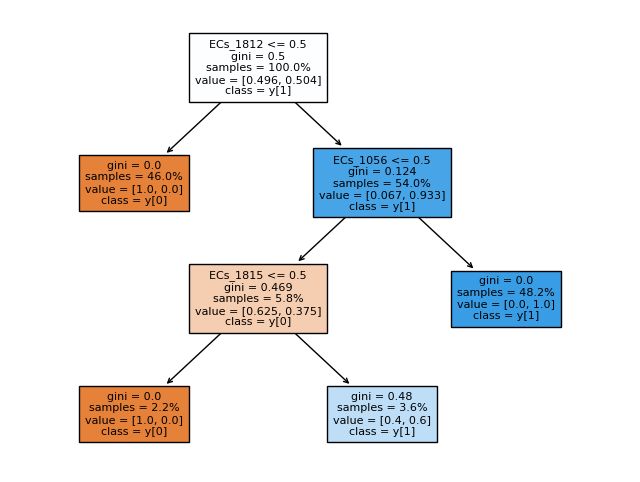

In [33]:
clf = DecisionTreeClassifier()
clf.set_params(**dt_opt_parameters)
clf.fit(X_train, y_train)
fig = plt.figure(figsize=(8,6))

_ = tree.plot_tree(clf, feature_names=X_train.columns, class_names=True, proportion=True, fontsize=8, filled=True)
fig.savefig("decistion_tree.pdf", format="pdf", bbox_inches = "tight")


In [34]:
X_red = X_resampled[["ECs_1812", "ECs_1056", "ECs_1815"]]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_red, y_resampled, stratify=y_resampled, test_size=0.2, random_state=2)

In [36]:
def loguniform(a, b):
    return _loguniform(10 ** a, 10 ** (a + b))

param_test_xgb ={'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth': [2, 3, 5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.15, 0.20],
    'min_child_weight': [1, 2, 3, 4]}

xgb = GridSearchCV(XGBClassifier(n_jobs=-1), param_test_xgb, n_jobs=-1, cv=KFold(n_splits=5), scoring='roc_auc')
xgb.fit(X_train, y_train)

print('Best score:', xgb.best_score_)
print('Best score:', xgb.best_params_)
xgb_opt_parameters = xgb.best_params_
param_test_lgbm ={'num_leaves': sp_randint(50, 200),
             'min_child_samples': sp_randint(10, 70), 
             'min_child_weight': loguniform(-3, 3),
             'subsample': sp_uniform(loc=0.3, scale=0.7), 
             'colsample_bytree': sp_uniform(loc=0.2, scale=0.6),
             'reg_alpha': loguniform(-7, 6),
             'reg_lambda': loguniform(-7, 6),
             'learning_rate' : loguniform(-4, 3)}

lgbm = RandomizedSearchCV(LGBMClassifier(n_jobs=-1), param_test_lgbm, n_iter=1000, n_jobs=-1, cv=KFold(n_splits=5), scoring='roc_auc')
lgbm.fit(X_train, y_train)

print('Best score:', lgbm.best_score_)
print('Best score:', lgbm.best_params_)
lgbm_opt_parameters = lgbm.best_params_
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [0.2, 0.4, 0.6, 0.8],
    'min_samples_leaf': [0.1, 0.2, 0.3, 0.4],
    'max_leaf_nodes': [4,10,20,50,None]
}

et = GridSearchCV(ExtraTreesClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=5), scoring='roc_auc')
et.fit(X_train, y_train)

print('Best score:', et.best_score_)
print('Best score:', et.best_params_)
et_opt_parameters = et.best_params_
params = {
    'n_estimators': sp_randint(10, 500),
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt'],
    'max_depth': sp_randint(1, 200),
    'min_samples_split': sp_uniform(loc=0.2, scale=0.6),
    'min_samples_leaf': sp_uniform(loc=0.1, scale=0.4)
}

rf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), params, n_iter = 100, n_jobs=-1, cv=KFold(n_splits=5), scoring='roc_auc')
rf.fit(X_train, y_train)

print('Best score:', rf.best_score_)
print('Best score:', rf.best_params_)
rf_opt_parameters = rf.best_params_
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20))}



dt = GridSearchCV(DecisionTreeClassifier(random_state=42), params, scoring="roc_auc", n_jobs=-1, verbose=1, cv=5)
dt.fit(X_train, y_train)
print(f"Best paramters: {dt.best_params_})")
print(f"Best score: {dt.best_score_})")
dt_opt_parameters = dt.best_params_
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}

SVC_cv = GridSearchCV(SVC(), param_grid=params, n_jobs=-1, cv = 5, scoring = 'roc_auc')
SVC_cv.fit(X_train, y_train)
print(f"Best paramters: {SVC_cv.best_params_})")
print(f"Best score: {SVC_cv.best_score_})")
svc_opt_parameters = SVC_cv.best_params_
param_grid_lr = {'max_iter': [100, 500, 1000],
        'penalty': ["l1"],
        'C' : [0.001,0.01,0.1,1,10,100],
        'solver':["liblinear"]}
        

lr_cv = GridSearchCV(LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
lr_cv.fit(X_train, y_train)
print(f"Best paramters: {lr_cv.best_params_})")
print(f"Best score: {lr_cv.best_score_})")
lr_opt_parameters = lr_cv.best_params_
param_test_gb ={'max_depth': sp_randint(10, 300)
             }

gb = RandomizedSearchCV(GradientBoostingClassifier(), param_test_gb, n_iter = 100, n_jobs=-1, cv=KFold(n_splits=5), scoring='roc_auc')
gb.fit(X_train, y_train)
print('Best score:', gb.best_score_)
print('Best score:', gb.best_params_)
gb_opt_parameters = gb.best_params_

Best score: 1.0
Best score: {'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100}
Best score: 1.0
Best score: {'colsample_bytree': 0.48091256742311, 'learning_rate': 0.004915229857281032, 'min_child_samples': 46, 'min_child_weight': 0.002025162726607078, 'num_leaves': 93, 'reg_alpha': 3.819548617668094e-05, 'reg_lambda': 0.022169955829745302, 'subsample': 0.6740603726209158}
Best score: 1.0
Best score: {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_leaf': 0.1, 'min_samples_split': 0.2, 'n_estimators': 100}
Best score: 1.0
Best score: {'criterion': 'entropy', 'max_depth': 113, 'max_features': 'auto', 'min_samples_leaf': 0.14347871454784902, 'min_samples_split': 0.485777748895928, 'n_estimators': 285}
Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 11824 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 21554 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 21660 out of 21660 | elapsed:   21.5s finished


Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Best score: 0.9994897959183675)
Best paramters: {'C': 6, 'kernel': 'linear'})
Best score: 0.992778649921507)
Best paramters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'})
Best score: 1.0)
Best score: 0.9994871794871795
Best score: {'max_depth': 247}


In [37]:
fit_params3={"early_stopping_rounds":50, 
             "eval_set" : [(X_test,y_test), (X_train, y_train)],
             "eval_metric": "roc_auc"}
classifiers = {
        'Logistic_Regression': LogisticRegression(random_state=42),
        'Random_Forest': RandomForestClassifier(random_state=42),
        'Gradient_Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100, validation_fraction=0.2, n_iter_no_change=10, tol=0.01),
        'Extra_Trees': ExtraTreesClassifier(random_state=42),
        'XGBoost': XGBClassifier(random_state=42),
        'LightGBM': LGBMClassifier(random_state=42, n_estimators=100000),
        'Decision_Tree': DecisionTreeClassifier(random_state=42),
        'SVM': SVC(probability = True, random_state=42)}

for clf_name, clf in classifiers.items():
    print(clf_name)
    # train on the top 6 features
    if clf_name == "XGBoost":
        clf.set_params()
        clf.fit(X_train, y_train)
    elif clf_name == "Extra_Trees":
        clf.set_params(**et_opt_parameters)
        clf.fit(X_train, y_train)
    elif clf_name == "Random_Forest":
        clf.set_params(**rf_opt_parameters)
        clf.fit(X_train, y_train)
    elif clf_name == "Decision_tree":
        clf.set_params(**dt_opt_parameters)
        clf.fit(X_train, y_train)
    elif clf_name == "SVM":
        clf.set_params(**svc_opt_parameters)
        clf.fit(X_train, y_train)
    elif clf_name == "Logistic_Regression":
        clf.set_params(**lr_opt_parameters)
        clf.fit(X_train, y_train)
    elif clf_name == "Gradient_Boosting":
        clf.set_params(**gb_opt_parameters)
        clf.fit(X_train, y_train)
    elif clf_name == "LightGBM":
        clf.set_params(**lgbm_opt_parameters)
        clf.fit(X_train, y_train, **fit_params3)
    else:
        clf.fit(X_train, y_train)
    # predict on the test set
    y_pred = clf.predict(X_test)
    # store the predicted values in a dataframe
    print(accuracy_score(y_test, y_pred))
    # store the selected features as a comma-separated string
    if clf_name == "XGBoost":
        clf.save_model("model_xgb_3.json")
   
    elif clf_name == "LightGBM":
        clf.booster_.save_model("Model_lgbm_3.txt")
    
    else:
        with open(f'{clf_name}_3.pkl', 'wb') as f:
            pickle.dump(clf, f)
    
    
            
f=open('list_of_features_3.txt','w')
for ele in X_train.columns:
    f.write(ele+'\n')
f.close()

Logistic_Regression
1.0
Random_Forest
1.0
Gradient_Boosting
1.0
Extra_Trees
1.0
XGBoost
1.0
LightGBM
[1]	training's binary_logloss: 0.689284	valid_0's binary_logloss: 0.690031
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.685077	valid_0's binary_logloss: 0.685739
[3]	training's binary_logloss: 0.682063	valid_0's binary_logloss: 0.682131
[4]	training's binary_logloss: 0.679079	valid_0's binary_logloss: 0.678554
[5]	training's binary_logloss: 0.674966	valid_0's binary_logloss: 0.674363
[6]	training's binary_logloss: 0.672037	valid_0's binary_logloss: 0.670849
[7]	training's binary_logloss: 0.669136	valid_0's binary_logloss: 0.667367
[8]	training's binary_logloss: 0.665485	valid_0's binary_logloss: 0.664193
[9]	training's binary_logloss: 0.661494	valid_0's binary_logloss: 0.660126
[10]	training's binary_logloss: 0.657908	valid_0's binary_logloss: 0.65701
[11]	training's binary_logloss: 0.655101	valid_0's binary_logloss: 0.653634
[12]	traini

[804]	training's binary_logloss: 0.0801633	valid_0's binary_logloss: 0.0706696
[805]	training's binary_logloss: 0.0801409	valid_0's binary_logloss: 0.0705936
[806]	training's binary_logloss: 0.0801187	valid_0's binary_logloss: 0.0705179
[807]	training's binary_logloss: 0.0800967	valid_0's binary_logloss: 0.0704427
[808]	training's binary_logloss: 0.0799376	valid_0's binary_logloss: 0.0702175
[809]	training's binary_logloss: 0.079812	valid_0's binary_logloss: 0.0702043
[810]	training's binary_logloss: 0.0797904	valid_0's binary_logloss: 0.0701298
[811]	training's binary_logloss: 0.0797689	valid_0's binary_logloss: 0.0700558
[812]	training's binary_logloss: 0.0796112	valid_0's binary_logloss: 0.0698322
[813]	training's binary_logloss: 0.0795902	valid_0's binary_logloss: 0.0697591
[814]	training's binary_logloss: 0.0794654	valid_0's binary_logloss: 0.0697464
[815]	training's binary_logloss: 0.0793089	valid_0's binary_logloss: 0.0695241
[816]	training's binary_logloss: 0.0791852	valid_0's 

[955]	training's binary_logloss: 0.0671683	valid_0's binary_logloss: 0.0571221
[956]	training's binary_logloss: 0.0671586	valid_0's binary_logloss: 0.057077
[957]	training's binary_logloss: 0.0670518	valid_0's binary_logloss: 0.0569098
[958]	training's binary_logloss: 0.0669639	valid_0's binary_logloss: 0.0569157
[959]	training's binary_logloss: 0.0668578	valid_0's binary_logloss: 0.0567492
[960]	training's binary_logloss: 0.0667705	valid_0's binary_logloss: 0.0567553
[961]	training's binary_logloss: 0.066761	valid_0's binary_logloss: 0.0567108
[962]	training's binary_logloss: 0.0666557	valid_0's binary_logloss: 0.0565452
[963]	training's binary_logloss: 0.0666464	valid_0's binary_logloss: 0.0565013
[964]	training's binary_logloss: 0.0665596	valid_0's binary_logloss: 0.0565077
[965]	training's binary_logloss: 0.0665504	valid_0's binary_logloss: 0.0564639
[966]	training's binary_logloss: 0.0665412	valid_0's binary_logloss: 0.0564203
[967]	training's binary_logloss: 0.0664367	valid_0's b

[1071]	training's binary_logloss: 0.0601486	valid_0's binary_logloss: 0.0508078
[1072]	training's binary_logloss: 0.0600845	valid_0's binary_logloss: 0.0508239
[1073]	training's binary_logloss: 0.0600783	valid_0's binary_logloss: 0.0507894
[1074]	training's binary_logloss: 0.0600147	valid_0's binary_logloss: 0.0508057
[1075]	training's binary_logloss: 0.0600085	valid_0's binary_logloss: 0.0507712
[1076]	training's binary_logloss: 0.0599454	valid_0's binary_logloss: 0.0507878
[1077]	training's binary_logloss: 0.0598607	valid_0's binary_logloss: 0.0506446
[1078]	training's binary_logloss: 0.0597981	valid_0's binary_logloss: 0.0506613
[1079]	training's binary_logloss: 0.0597361	valid_0's binary_logloss: 0.0506782
[1080]	training's binary_logloss: 0.0596518	valid_0's binary_logloss: 0.0505354
[1081]	training's binary_logloss: 0.0595902	valid_0's binary_logloss: 0.0505524
[1082]	training's binary_logloss: 0.0595291	valid_0's binary_logloss: 0.0505698
[1083]	training's binary_logloss: 0.0595

[1181]	training's binary_logloss: 0.0550751	valid_0's binary_logloss: 0.0464075
[1182]	training's binary_logloss: 0.0550275	valid_0's binary_logloss: 0.0464289
[1183]	training's binary_logloss: 0.0549572	valid_0's binary_logloss: 0.0463027
[1184]	training's binary_logloss: 0.0549527	valid_0's binary_logloss: 0.0462743
[1185]	training's binary_logloss: 0.0549054	valid_0's binary_logloss: 0.0462958
[1186]	training's binary_logloss: 0.0548355	valid_0's binary_logloss: 0.0461701
[1187]	training's binary_logloss: 0.054766	valid_0's binary_logloss: 0.0460452
[1188]	training's binary_logloss: 0.0547189	valid_0's binary_logloss: 0.0460666
[1189]	training's binary_logloss: 0.0546722	valid_0's binary_logloss: 0.0460882
[1190]	training's binary_logloss: 0.0546678	valid_0's binary_logloss: 0.04606
[1191]	training's binary_logloss: 0.0545986	valid_0's binary_logloss: 0.0459353
[1192]	training's binary_logloss: 0.0545943	valid_0's binary_logloss: 0.0459075
[1193]	training's binary_logloss: 0.0545256

[1298]	training's binary_logloss: 0.0507603	valid_0's binary_logloss: 0.0418326
[1299]	training's binary_logloss: 0.0507218	valid_0's binary_logloss: 0.0418554
[1300]	training's binary_logloss: 0.0506657	valid_0's binary_logloss: 0.0417489
[1301]	training's binary_logloss: 0.0506274	valid_0's binary_logloss: 0.0417717
[1302]	training's binary_logloss: 0.0506245	valid_0's binary_logloss: 0.04175
[1303]	training's binary_logloss: 0.0505865	valid_0's binary_logloss: 0.0417729
[1304]	training's binary_logloss: 0.0505489	valid_0's binary_logloss: 0.0417958
[1305]	training's binary_logloss: 0.0505116	valid_0's binary_logloss: 0.0418188
[1306]	training's binary_logloss: 0.0505086	valid_0's binary_logloss: 0.0417967
[1307]	training's binary_logloss: 0.0505057	valid_0's binary_logloss: 0.0417748
[1308]	training's binary_logloss: 0.0504686	valid_0's binary_logloss: 0.0417979
[1309]	training's binary_logloss: 0.0504319	valid_0's binary_logloss: 0.0418211
[1310]	training's binary_logloss: 0.050375

[1449]	training's binary_logloss: 0.0461325	valid_0's binary_logloss: 0.0379241
[1450]	training's binary_logloss: 0.0461301	valid_0's binary_logloss: 0.0379048
[1451]	training's binary_logloss: 0.046104	valid_0's binary_logloss: 0.0379282
[1452]	training's binary_logloss: 0.0460596	valid_0's binary_logloss: 0.037838
[1453]	training's binary_logloss: 0.0460155	valid_0's binary_logloss: 0.0377483
[1454]	training's binary_logloss: 0.0459716	valid_0's binary_logloss: 0.037659
[1455]	training's binary_logloss: 0.0459281	valid_0's binary_logloss: 0.0375703
[1456]	training's binary_logloss: 0.0459258	valid_0's binary_logloss: 0.0375517
[1457]	training's binary_logloss: 0.0458825	valid_0's binary_logloss: 0.0374634
[1458]	training's binary_logloss: 0.0458803	valid_0's binary_logloss: 0.0374451
[1459]	training's binary_logloss: 0.0458373	valid_0's binary_logloss: 0.0373575
[1460]	training's binary_logloss: 0.0458107	valid_0's binary_logloss: 0.0373806
[1461]	training's binary_logloss: 0.045768	

[1560]	training's binary_logloss: 0.0435797	valid_0's binary_logloss: 0.035062
[1561]	training's binary_logloss: 0.043578	valid_0's binary_logloss: 0.0350463
[1562]	training's binary_logloss: 0.0435556	valid_0's binary_logloss: 0.0350688
[1563]	training's binary_logloss: 0.043519	valid_0's binary_logloss: 0.0349914
[1564]	training's binary_logloss: 0.0434967	valid_0's binary_logloss: 0.035014
[1565]	training's binary_logloss: 0.0434949	valid_0's binary_logloss: 0.0349982
[1566]	training's binary_logloss: 0.0434728	valid_0's binary_logloss: 0.0350207
[1567]	training's binary_logloss: 0.0434508	valid_0's binary_logloss: 0.0350432
[1568]	training's binary_logloss: 0.0434291	valid_0's binary_logloss: 0.0350658
[1569]	training's binary_logloss: 0.0434075	valid_0's binary_logloss: 0.0350883
[1570]	training's binary_logloss: 0.0433709	valid_0's binary_logloss: 0.0350107
[1571]	training's binary_logloss: 0.0433346	valid_0's binary_logloss: 0.0349335
[1572]	training's binary_logloss: 0.0433328	

[1721]	training's binary_logloss: 0.040794	valid_0's binary_logloss: 0.0316138
[1722]	training's binary_logloss: 0.0407741	valid_0's binary_logloss: 0.031635
[1723]	training's binary_logloss: 0.0407732	valid_0's binary_logloss: 0.0316241
[1724]	training's binary_logloss: 0.0407454	valid_0's binary_logloss: 0.0315622
[1725]	training's binary_logloss: 0.0407444	valid_0's binary_logloss: 0.0315514
[1726]	training's binary_logloss: 0.0407246	valid_0's binary_logloss: 0.0315726
[1727]	training's binary_logloss: 0.0406969	valid_0's binary_logloss: 0.0315109
[1728]	training's binary_logloss: 0.040696	valid_0's binary_logloss: 0.0315002
[1729]	training's binary_logloss: 0.0406762	valid_0's binary_logloss: 0.0315213
[1730]	training's binary_logloss: 0.0406753	valid_0's binary_logloss: 0.0315105
[1731]	training's binary_logloss: 0.0406478	valid_0's binary_logloss: 0.0314491
[1732]	training's binary_logloss: 0.0406204	valid_0's binary_logloss: 0.031388
[1733]	training's binary_logloss: 0.0406006	

[1871]	training's binary_logloss: 0.0387286	valid_0's binary_logloss: 0.0289652
[1872]	training's binary_logloss: 0.0387099	valid_0's binary_logloss: 0.0289849
[1873]	training's binary_logloss: 0.0387094	valid_0's binary_logloss: 0.0289775
[1874]	training's binary_logloss: 0.038688	valid_0's binary_logloss: 0.0289277
[1875]	training's binary_logloss: 0.0386666	valid_0's binary_logloss: 0.0288782
[1876]	training's binary_logloss: 0.0386662	valid_0's binary_logloss: 0.0288711
[1877]	training's binary_logloss: 0.038645	valid_0's binary_logloss: 0.0288219
[1878]	training's binary_logloss: 0.0386446	valid_0's binary_logloss: 0.0288149
[1879]	training's binary_logloss: 0.0386235	valid_0's binary_logloss: 0.0287659
[1880]	training's binary_logloss: 0.0386046	valid_0's binary_logloss: 0.0287855
[1881]	training's binary_logloss: 0.0385858	valid_0's binary_logloss: 0.0288051
[1882]	training's binary_logloss: 0.0385854	valid_0's binary_logloss: 0.028798
[1883]	training's binary_logloss: 0.0385644

[1993]	training's binary_logloss: 0.0371945	valid_0's binary_logloss: 0.0273708
[1994]	training's binary_logloss: 0.0371778	valid_0's binary_logloss: 0.0273893
[1995]	training's binary_logloss: 0.0371612	valid_0's binary_logloss: 0.0274078
[1996]	training's binary_logloss: 0.0371447	valid_0's binary_logloss: 0.0274263
[1997]	training's binary_logloss: 0.0371284	valid_0's binary_logloss: 0.0274448
[1998]	training's binary_logloss: 0.0371279	valid_0's binary_logloss: 0.027438
[1999]	training's binary_logloss: 0.0371118	valid_0's binary_logloss: 0.0274565
[2000]	training's binary_logloss: 0.0370957	valid_0's binary_logloss: 0.027475
[2001]	training's binary_logloss: 0.0370779	valid_0's binary_logloss: 0.0274321
[2002]	training's binary_logloss: 0.0370774	valid_0's binary_logloss: 0.0274252
[2003]	training's binary_logloss: 0.0370614	valid_0's binary_logloss: 0.0274436
[2004]	training's binary_logloss: 0.0370456	valid_0's binary_logloss: 0.0274621
[2005]	training's binary_logloss: 0.037045

[2190]	training's binary_logloss: 0.0352434	valid_0's binary_logloss: 0.0256583
[2191]	training's binary_logloss: 0.0352431	valid_0's binary_logloss: 0.0256521
[2192]	training's binary_logloss: 0.0352298	valid_0's binary_logloss: 0.025669
[2193]	training's binary_logloss: 0.0352159	valid_0's binary_logloss: 0.0256339
[2194]	training's binary_logloss: 0.035202	valid_0's binary_logloss: 0.0255991
[2195]	training's binary_logloss: 0.0351882	valid_0's binary_logloss: 0.0255644
[2196]	training's binary_logloss: 0.0351749	valid_0's binary_logloss: 0.0255812
[2197]	training's binary_logloss: 0.0351612	valid_0's binary_logloss: 0.0255466
[2198]	training's binary_logloss: 0.0351608	valid_0's binary_logloss: 0.0255406
[2199]	training's binary_logloss: 0.0351604	valid_0's binary_logloss: 0.0255345
[2200]	training's binary_logloss: 0.0351471	valid_0's binary_logloss: 0.0255513
[2201]	training's binary_logloss: 0.035134	valid_0's binary_logloss: 0.025568
[2202]	training's binary_logloss: 0.0351203	

[2295]	training's binary_logloss: 0.0343295	valid_0's binary_logloss: 0.0245601
[2296]	training's binary_logloss: 0.0343179	valid_0's binary_logloss: 0.0245303
[2297]	training's binary_logloss: 0.0343176	valid_0's binary_logloss: 0.0245251
[2298]	training's binary_logloss: 0.0343047	valid_0's binary_logloss: 0.0245409
[2299]	training's binary_logloss: 0.0343044	valid_0's binary_logloss: 0.0245357
[2300]	training's binary_logloss: 0.0342917	valid_0's binary_logloss: 0.0245515
[2301]	training's binary_logloss: 0.0342801	valid_0's binary_logloss: 0.0245217
[2302]	training's binary_logloss: 0.0342674	valid_0's binary_logloss: 0.0245375
[2303]	training's binary_logloss: 0.0342548	valid_0's binary_logloss: 0.0245532
[2304]	training's binary_logloss: 0.0342423	valid_0's binary_logloss: 0.024569
[2305]	training's binary_logloss: 0.0342307	valid_0's binary_logloss: 0.0245391
[2306]	training's binary_logloss: 0.0342183	valid_0's binary_logloss: 0.0245548
[2307]	training's binary_logloss: 0.03420

[2411]	training's binary_logloss: 0.0334391	valid_0's binary_logloss: 0.0239284
[2412]	training's binary_logloss: 0.0334387	valid_0's binary_logloss: 0.0239225
[2413]	training's binary_logloss: 0.0334278	valid_0's binary_logloss: 0.0239373
[2414]	training's binary_logloss: 0.0334175	valid_0's binary_logloss: 0.0239102
[2415]	training's binary_logloss: 0.0334073	valid_0's binary_logloss: 0.0238832
[2416]	training's binary_logloss: 0.0333971	valid_0's binary_logloss: 0.0238563
[2417]	training's binary_logloss: 0.0333862	valid_0's binary_logloss: 0.0238711
[2418]	training's binary_logloss: 0.0333754	valid_0's binary_logloss: 0.0238858
[2419]	training's binary_logloss: 0.033375	valid_0's binary_logloss: 0.0238799
[2420]	training's binary_logloss: 0.0333746	valid_0's binary_logloss: 0.023874
[2421]	training's binary_logloss: 0.0333742	valid_0's binary_logloss: 0.0238682
[2422]	training's binary_logloss: 0.0333738	valid_0's binary_logloss: 0.0238623
[2423]	training's binary_logloss: 0.033363

[2537]	training's binary_logloss: 0.0326006	valid_0's binary_logloss: 0.0230332
[2538]	training's binary_logloss: 0.0325921	valid_0's binary_logloss: 0.0230101
[2539]	training's binary_logloss: 0.0325836	valid_0's binary_logloss: 0.0229872
[2540]	training's binary_logloss: 0.0325734	valid_0's binary_logloss: 0.023001
[2541]	training's binary_logloss: 0.0325633	valid_0's binary_logloss: 0.0230148
[2542]	training's binary_logloss: 0.0325629	valid_0's binary_logloss: 0.0230093
[2543]	training's binary_logloss: 0.0325528	valid_0's binary_logloss: 0.0230231
[2544]	training's binary_logloss: 0.0325429	valid_0's binary_logloss: 0.0230368
[2545]	training's binary_logloss: 0.0325344	valid_0's binary_logloss: 0.0230137
[2546]	training's binary_logloss: 0.0325259	valid_0's binary_logloss: 0.0229908
[2547]	training's binary_logloss: 0.0325175	valid_0's binary_logloss: 0.022968
[2548]	training's binary_logloss: 0.0325075	valid_0's binary_logloss: 0.0229817
[2549]	training's binary_logloss: 0.032507

[2719]	training's binary_logloss: 0.0315198	valid_0's binary_logloss: 0.0223351
[2720]	training's binary_logloss: 0.0315126	valid_0's binary_logloss: 0.022315
[2721]	training's binary_logloss: 0.0315048	valid_0's binary_logloss: 0.0223273
[2722]	training's binary_logloss: 0.031497	valid_0's binary_logloss: 0.0223396
[2723]	training's binary_logloss: 0.0314894	valid_0's binary_logloss: 0.0223518
[2724]	training's binary_logloss: 0.0314888	valid_0's binary_logloss: 0.0223451
[2725]	training's binary_logloss: 0.0314883	valid_0's binary_logloss: 0.0223384
[2726]	training's binary_logloss: 0.0314877	valid_0's binary_logloss: 0.0223317
[2727]	training's binary_logloss: 0.0314871	valid_0's binary_logloss: 0.0223251
[2728]	training's binary_logloss: 0.0314799	valid_0's binary_logloss: 0.0223051
[2729]	training's binary_logloss: 0.0314794	valid_0's binary_logloss: 0.0222985
[2730]	training's binary_logloss: 0.0314789	valid_0's binary_logloss: 0.022292
[2731]	training's binary_logloss: 0.0314717

[2861]	training's binary_logloss: 0.0308823	valid_0's binary_logloss: 0.0217169
[2862]	training's binary_logloss: 0.0308754	valid_0's binary_logloss: 0.0217283
[2863]	training's binary_logloss: 0.0308691	valid_0's binary_logloss: 0.0217106
[2864]	training's binary_logloss: 0.0308622	valid_0's binary_logloss: 0.021722
[2865]	training's binary_logloss: 0.030856	valid_0's binary_logloss: 0.0217043
[2866]	training's binary_logloss: 0.0308555	valid_0's binary_logloss: 0.021698
[2867]	training's binary_logloss: 0.030855	valid_0's binary_logloss: 0.0216917
[2868]	training's binary_logloss: 0.0308488	valid_0's binary_logloss: 0.0216741
[2869]	training's binary_logloss: 0.0308483	valid_0's binary_logloss: 0.0216679
[2870]	training's binary_logloss: 0.0308421	valid_0's binary_logloss: 0.0216504
[2871]	training's binary_logloss: 0.030836	valid_0's binary_logloss: 0.021633
[2872]	training's binary_logloss: 0.0308355	valid_0's binary_logloss: 0.021627
[2873]	training's binary_logloss: 0.0308285	val

[2977]	training's binary_logloss: 0.0303917	valid_0's binary_logloss: 0.0212315
[2978]	training's binary_logloss: 0.0303853	valid_0's binary_logloss: 0.0212423
[2979]	training's binary_logloss: 0.0303798	valid_0's binary_logloss: 0.0212264
[2980]	training's binary_logloss: 0.0303744	valid_0's binary_logloss: 0.0212107
[2981]	training's binary_logloss: 0.030368	valid_0's binary_logloss: 0.0212214
[2982]	training's binary_logloss: 0.0303626	valid_0's binary_logloss: 0.0212057
[2983]	training's binary_logloss: 0.0303562	valid_0's binary_logloss: 0.0212164
[2984]	training's binary_logloss: 0.0303508	valid_0's binary_logloss: 0.0212007
[2985]	training's binary_logloss: 0.0303454	valid_0's binary_logloss: 0.0211851
[2986]	training's binary_logloss: 0.0303449	valid_0's binary_logloss: 0.0211791
[2987]	training's binary_logloss: 0.0303385	valid_0's binary_logloss: 0.0211898
[2988]	training's binary_logloss: 0.030338	valid_0's binary_logloss: 0.0211837
[2989]	training's binary_logloss: 0.030331

[3082]	training's binary_logloss: 0.0299757	valid_0's binary_logloss: 0.020922
[3083]	training's binary_logloss: 0.02997	valid_0's binary_logloss: 0.0209321
[3084]	training's binary_logloss: 0.029965	valid_0's binary_logloss: 0.0209175
[3085]	training's binary_logloss: 0.0299594	valid_0's binary_logloss: 0.0209275
[3086]	training's binary_logloss: 0.0299588	valid_0's binary_logloss: 0.0209211
[3087]	training's binary_logloss: 0.0299582	valid_0's binary_logloss: 0.0209148
[3088]	training's binary_logloss: 0.0299526	valid_0's binary_logloss: 0.0209248
[3089]	training's binary_logloss: 0.0299477	valid_0's binary_logloss: 0.0209102
[3090]	training's binary_logloss: 0.0299421	valid_0's binary_logloss: 0.0209202
[3091]	training's binary_logloss: 0.0299371	valid_0's binary_logloss: 0.0209056
[3092]	training's binary_logloss: 0.0299365	valid_0's binary_logloss: 0.0208992
[3093]	training's binary_logloss: 0.029936	valid_0's binary_logloss: 0.0208929
[3094]	training's binary_logloss: 0.029931	va

[3194]	training's binary_logloss: 0.0296024	valid_0's binary_logloss: 0.020393
[3195]	training's binary_logloss: 0.0295982	valid_0's binary_logloss: 0.0203804
[3196]	training's binary_logloss: 0.0295925	valid_0's binary_logloss: 0.02039
[3197]	training's binary_logloss: 0.0295868	valid_0's binary_logloss: 0.0203997
[3198]	training's binary_logloss: 0.0295826	valid_0's binary_logloss: 0.0203871
[3199]	training's binary_logloss: 0.0295821	valid_0's binary_logloss: 0.0203816
[3200]	training's binary_logloss: 0.0295765	valid_0's binary_logloss: 0.0203912
[3201]	training's binary_logloss: 0.0295709	valid_0's binary_logloss: 0.0204008
[3202]	training's binary_logloss: 0.0295667	valid_0's binary_logloss: 0.0203882
[3203]	training's binary_logloss: 0.0295662	valid_0's binary_logloss: 0.0203826
[3204]	training's binary_logloss: 0.029562	valid_0's binary_logloss: 0.0203701
[3205]	training's binary_logloss: 0.0295615	valid_0's binary_logloss: 0.0203645
[3206]	training's binary_logloss: 0.0295559	

[3314]	training's binary_logloss: 0.0292028	valid_0's binary_logloss: 0.0201925
[3315]	training's binary_logloss: 0.0291988	valid_0's binary_logloss: 0.0201806
[3316]	training's binary_logloss: 0.0291941	valid_0's binary_logloss: 0.0201895
[3317]	training's binary_logloss: 0.0291894	valid_0's binary_logloss: 0.0201983
[3318]	training's binary_logloss: 0.0291888	valid_0's binary_logloss: 0.0201921
[3319]	training's binary_logloss: 0.0291882	valid_0's binary_logloss: 0.020186
[3320]	training's binary_logloss: 0.0291835	valid_0's binary_logloss: 0.0201948
[3321]	training's binary_logloss: 0.0291829	valid_0's binary_logloss: 0.0201886
[3322]	training's binary_logloss: 0.0291823	valid_0's binary_logloss: 0.0201825
[3323]	training's binary_logloss: 0.0291777	valid_0's binary_logloss: 0.0201913
[3324]	training's binary_logloss: 0.0291738	valid_0's binary_logloss: 0.0201794
[3325]	training's binary_logloss: 0.0291699	valid_0's binary_logloss: 0.0201675
[3326]	training's binary_logloss: 0.02916

[3421]	training's binary_logloss: 0.0288858	valid_0's binary_logloss: 0.0200225
[3422]	training's binary_logloss: 0.0288851	valid_0's binary_logloss: 0.0200159
[3423]	training's binary_logloss: 0.0288814	valid_0's binary_logloss: 0.0200045
[3424]	training's binary_logloss: 0.0288774	valid_0's binary_logloss: 0.0200128
[3425]	training's binary_logloss: 0.0288737	valid_0's binary_logloss: 0.0200013
[3426]	training's binary_logloss: 0.028873	valid_0's binary_logloss: 0.0199948
[3427]	training's binary_logloss: 0.028869	valid_0's binary_logloss: 0.020003
[3428]	training's binary_logloss: 0.0288653	valid_0's binary_logloss: 0.0199916
[3429]	training's binary_logloss: 0.0288614	valid_0's binary_logloss: 0.0199999
[3430]	training's binary_logloss: 0.0288577	valid_0's binary_logloss: 0.0199885
[3431]	training's binary_logloss: 0.0288537	valid_0's binary_logloss: 0.0199967
[3432]	training's binary_logloss: 0.028853	valid_0's binary_logloss: 0.0199901
[3433]	training's binary_logloss: 0.0288524	

[3525]	training's binary_logloss: 0.0286121	valid_0's binary_logloss: 0.0196037
[3526]	training's binary_logloss: 0.0286081	valid_0's binary_logloss: 0.0196117
[3527]	training's binary_logloss: 0.0286075	valid_0's binary_logloss: 0.0196059
[3528]	training's binary_logloss: 0.0286043	valid_0's binary_logloss: 0.0195959
[3529]	training's binary_logloss: 0.0286011	valid_0's binary_logloss: 0.019586
[3530]	training's binary_logloss: 0.0285971	valid_0's binary_logloss: 0.019594
[3531]	training's binary_logloss: 0.0285965	valid_0's binary_logloss: 0.0195882
[3532]	training's binary_logloss: 0.0285925	valid_0's binary_logloss: 0.0195961
[3533]	training's binary_logloss: 0.0285893	valid_0's binary_logloss: 0.0195862
[3534]	training's binary_logloss: 0.0285862	valid_0's binary_logloss: 0.0195764
[3535]	training's binary_logloss: 0.028583	valid_0's binary_logloss: 0.0195666
[3536]	training's binary_logloss: 0.0285799	valid_0's binary_logloss: 0.0195569
[3537]	training's binary_logloss: 0.0285793

[3630]	training's binary_logloss: 0.0283456	valid_0's binary_logloss: 0.0193542
[3631]	training's binary_logloss: 0.0283428	valid_0's binary_logloss: 0.0193451
[3632]	training's binary_logloss: 0.0283422	valid_0's binary_logloss: 0.0193394
[3633]	training's binary_logloss: 0.0283416	valid_0's binary_logloss: 0.0193337
[3634]	training's binary_logloss: 0.028341	valid_0's binary_logloss: 0.0193281
[3635]	training's binary_logloss: 0.0283372	valid_0's binary_logloss: 0.0193356
[3636]	training's binary_logloss: 0.0283367	valid_0's binary_logloss: 0.0193299
[3637]	training's binary_logloss: 0.0283329	valid_0's binary_logloss: 0.0193374
[3638]	training's binary_logloss: 0.0283323	valid_0's binary_logloss: 0.0193317
[3639]	training's binary_logloss: 0.0283318	valid_0's binary_logloss: 0.0193261
[3640]	training's binary_logloss: 0.0283312	valid_0's binary_logloss: 0.0193204
[3641]	training's binary_logloss: 0.0283306	valid_0's binary_logloss: 0.0193148
[3642]	training's binary_logloss: 0.02832

[3734]	training's binary_logloss: 0.0281072	valid_0's binary_logloss: 0.0191387
[3735]	training's binary_logloss: 0.0281038	valid_0's binary_logloss: 0.0191458
[3736]	training's binary_logloss: 0.0281012	valid_0's binary_logloss: 0.0191373
[3737]	training's binary_logloss: 0.0280978	valid_0's binary_logloss: 0.0191444
[3738]	training's binary_logloss: 0.0280952	valid_0's binary_logloss: 0.019136
[3739]	training's binary_logloss: 0.0280918	valid_0's binary_logloss: 0.0191431
[3740]	training's binary_logloss: 0.0280884	valid_0's binary_logloss: 0.0191502
[3741]	training's binary_logloss: 0.0280858	valid_0's binary_logloss: 0.0191418
[3742]	training's binary_logloss: 0.0280832	valid_0's binary_logloss: 0.0191334
[3743]	training's binary_logloss: 0.0280806	valid_0's binary_logloss: 0.0191251
[3744]	training's binary_logloss: 0.028078	valid_0's binary_logloss: 0.0191168
[3745]	training's binary_logloss: 0.0280774	valid_0's binary_logloss: 0.019111
[3746]	training's binary_logloss: 0.0280768

[3876]	training's binary_logloss: 0.0278216	valid_0's binary_logloss: 0.0188448
[3877]	training's binary_logloss: 0.0278185	valid_0's binary_logloss: 0.0188514
[3878]	training's binary_logloss: 0.0278162	valid_0's binary_logloss: 0.0188438
[3879]	training's binary_logloss: 0.0278131	valid_0's binary_logloss: 0.0188504
[3880]	training's binary_logloss: 0.0278101	valid_0's binary_logloss: 0.018857
[3881]	training's binary_logloss: 0.0278078	valid_0's binary_logloss: 0.0188493
[3882]	training's binary_logloss: 0.0278054	valid_0's binary_logloss: 0.0188417
[3883]	training's binary_logloss: 0.0278048	valid_0's binary_logloss: 0.0188362
[3884]	training's binary_logloss: 0.0278025	valid_0's binary_logloss: 0.0188286
[3885]	training's binary_logloss: 0.0277995	valid_0's binary_logloss: 0.0188352
[3886]	training's binary_logloss: 0.0277971	valid_0's binary_logloss: 0.0188276
[3887]	training's binary_logloss: 0.0277966	valid_0's binary_logloss: 0.0188221
[3888]	training's binary_logloss: 0.02779

[3995]	training's binary_logloss: 0.0275865	valid_0's binary_logloss: 0.0186065
[3996]	training's binary_logloss: 0.0275837	valid_0's binary_logloss: 0.0186127
[3997]	training's binary_logloss: 0.0275831	valid_0's binary_logloss: 0.0186074
[3998]	training's binary_logloss: 0.0275825	valid_0's binary_logloss: 0.018602
[3999]	training's binary_logloss: 0.0275805	valid_0's binary_logloss: 0.0185952
[4000]	training's binary_logloss: 0.0275776	valid_0's binary_logloss: 0.0186014
[4001]	training's binary_logloss: 0.0275748	valid_0's binary_logloss: 0.0186076
[4002]	training's binary_logloss: 0.027572	valid_0's binary_logloss: 0.0186138
[4003]	training's binary_logloss: 0.0275714	valid_0's binary_logloss: 0.0186084
[4004]	training's binary_logloss: 0.0275693	valid_0's binary_logloss: 0.0186015
[4005]	training's binary_logloss: 0.0275665	valid_0's binary_logloss: 0.0186077
[4006]	training's binary_logloss: 0.0275645	valid_0's binary_logloss: 0.0186008
[4007]	training's binary_logloss: 0.027563

[4111]	training's binary_logloss: 0.0273753	valid_0's binary_logloss: 0.0184143
[4112]	training's binary_logloss: 0.0273734	valid_0's binary_logloss: 0.0184081
[4113]	training's binary_logloss: 0.0273728	valid_0's binary_logloss: 0.0184028
[4114]	training's binary_logloss: 0.0273722	valid_0's binary_logloss: 0.0183975
[4115]	training's binary_logloss: 0.0273704	valid_0's binary_logloss: 0.0183913
[4116]	training's binary_logloss: 0.0273698	valid_0's binary_logloss: 0.0183861
[4117]	training's binary_logloss: 0.027368	valid_0's binary_logloss: 0.0183799
[4118]	training's binary_logloss: 0.0273661	valid_0's binary_logloss: 0.0183738
[4119]	training's binary_logloss: 0.0273643	valid_0's binary_logloss: 0.0183677
[4120]	training's binary_logloss: 0.0273625	valid_0's binary_logloss: 0.0183616
[4121]	training's binary_logloss: 0.0273607	valid_0's binary_logloss: 0.0183556
[4122]	training's binary_logloss: 0.0273589	valid_0's binary_logloss: 0.0183495
[4123]	training's binary_logloss: 0.02735

[4215]	training's binary_logloss: 0.0272025	valid_0's binary_logloss: 0.0181927
[4216]	training's binary_logloss: 0.0272	valid_0's binary_logloss: 0.0181983
[4217]	training's binary_logloss: 0.0271975	valid_0's binary_logloss: 0.0182038
[4218]	training's binary_logloss: 0.027195	valid_0's binary_logloss: 0.0182094
[4219]	training's binary_logloss: 0.0271925	valid_0's binary_logloss: 0.0182149
[4220]	training's binary_logloss: 0.0271909	valid_0's binary_logloss: 0.0182093
[4221]	training's binary_logloss: 0.0271903	valid_0's binary_logloss: 0.0182042
[4222]	training's binary_logloss: 0.0271878	valid_0's binary_logloss: 0.0182097
[4223]	training's binary_logloss: 0.0271862	valid_0's binary_logloss: 0.0182042
[4224]	training's binary_logloss: 0.0271845	valid_0's binary_logloss: 0.0181986
[4225]	training's binary_logloss: 0.0271829	valid_0's binary_logloss: 0.0181931
[4226]	training's binary_logloss: 0.0271823	valid_0's binary_logloss: 0.018188
[4227]	training's binary_logloss: 0.0271818	v

[4322]	training's binary_logloss: 0.0270568	valid_0's binary_logloss: 0.0179233
[4323]	training's binary_logloss: 0.0270563	valid_0's binary_logloss: 0.017919
[4324]	training's binary_logloss: 0.027055	valid_0's binary_logloss: 0.0179143
[4325]	training's binary_logloss: 0.0270523	valid_0's binary_logloss: 0.0179197
[4326]	training's binary_logloss: 0.0270509	valid_0's binary_logloss: 0.017915
[4327]	training's binary_logloss: 0.0270483	valid_0's binary_logloss: 0.0179205
[4328]	training's binary_logloss: 0.0270456	valid_0's binary_logloss: 0.0179259
[4329]	training's binary_logloss: 0.0270452	valid_0's binary_logloss: 0.0179215
[4330]	training's binary_logloss: 0.0270438	valid_0's binary_logloss: 0.0179168
[4331]	training's binary_logloss: 0.0270412	valid_0's binary_logloss: 0.0179222
[4332]	training's binary_logloss: 0.0270407	valid_0's binary_logloss: 0.0179178
[4333]	training's binary_logloss: 0.0270381	valid_0's binary_logloss: 0.0179232
[4334]	training's binary_logloss: 0.0270355

[4443]	training's binary_logloss: 0.0268716	valid_0's binary_logloss: 0.0177934
[4444]	training's binary_logloss: 0.0268704	valid_0's binary_logloss: 0.0177891
[4445]	training's binary_logloss: 0.0268692	valid_0's binary_logloss: 0.0177848
[4446]	training's binary_logloss: 0.0268668	valid_0's binary_logloss: 0.0177899
[4447]	training's binary_logloss: 0.0268644	valid_0's binary_logloss: 0.0177949
[4448]	training's binary_logloss: 0.0268621	valid_0's binary_logloss: 0.0177999
[4449]	training's binary_logloss: 0.0268598	valid_0's binary_logloss: 0.0178049
[4450]	training's binary_logloss: 0.0268585	valid_0's binary_logloss: 0.0178006
[4451]	training's binary_logloss: 0.0268562	valid_0's binary_logloss: 0.0178056
[4452]	training's binary_logloss: 0.0268557	valid_0's binary_logloss: 0.0178009
[4453]	training's binary_logloss: 0.0268534	valid_0's binary_logloss: 0.0178059
[4454]	training's binary_logloss: 0.0268511	valid_0's binary_logloss: 0.0178108
[4455]	training's binary_logloss: 0.0268

[4580]	training's binary_logloss: 0.026702	valid_0's binary_logloss: 0.0175803
[4581]	training's binary_logloss: 0.0266998	valid_0's binary_logloss: 0.0175851
[4582]	training's binary_logloss: 0.0266976	valid_0's binary_logloss: 0.0175899
[4583]	training's binary_logloss: 0.0266954	valid_0's binary_logloss: 0.0175946
[4584]	training's binary_logloss: 0.0266949	valid_0's binary_logloss: 0.0175903
[4585]	training's binary_logloss: 0.0266927	valid_0's binary_logloss: 0.0175951
[4586]	training's binary_logloss: 0.0266917	valid_0's binary_logloss: 0.0175912
[4587]	training's binary_logloss: 0.0266895	valid_0's binary_logloss: 0.0175959
[4588]	training's binary_logloss: 0.026689	valid_0's binary_logloss: 0.0175916
[4589]	training's binary_logloss: 0.0266879	valid_0's binary_logloss: 0.0175877
[4590]	training's binary_logloss: 0.0266857	valid_0's binary_logloss: 0.0175924
[4591]	training's binary_logloss: 0.0266853	valid_0's binary_logloss: 0.0175881
[4592]	training's binary_logloss: 0.026683